In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the excel file
df = pd.read_excel('concat.xlsx')

In [3]:
# create two new columns to measure performance difference
df['fixed_diff'] = df['fixed_jan'] - df['fixed_dec']
df['para_diff'] = df['para_jan'] - df['para_dec']

In [4]:
# repositioning columns
df = df[['item', 'fixed_dec', 'fixed_jan','fixed_diff', 'para_dec', 'para_jan', 'para_diff', 'category']]

In [5]:
df.head(10)

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
0,Revenue Vehicles owned,52.0,52.0,0.0,47.0,47.0,0.0,vehicles_vehicles
1,Revenue Vehicles leased,0.0,0.0,0.0,0.0,0.0,0.0,vehicles_vehicles
2,Light Vehicles owned,16.0,16.0,0.0,0.0,0.0,0.0,vehicles_vehicles
3,Light Vehicles leased,0.0,0.0,0.0,0.0,0.0,0.0,vehicles_vehicles
4,Number of active routes,19.0,19.0,0.0,43.0,43.0,0.0,vehicles_routes
5,Corporate headcount,7.0,7.0,0.0,0.0,0.0,0.0,headcount_corporate
6,Local Operators headcount,109.0,109.0,0.0,40.0,40.0,0.0,headcount_ops
7,Local Maintenance headcount,28.0,29.0,1.0,0.0,0.0,0.0,headcount_maintenance
8,Local Other headcount,18.0,18.0,0.0,7.0,7.0,0.0,headcount_other
9,Regular Hours Worked ops,13634.0,14231.0,597.0,4457.0,3327.0,-1130.0,hr_ops


In [6]:
# filter the data to only show kpi differences

df_filtered = df[(df['fixed_diff'] != 0) | (df['para_diff'] != 0)]
df_filtered.sort_index().head(10)


,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
7,Local Maintenance headcount,28.0,29.0,1.0,0.0,0.0,0.0,headcount_maintenance
9,Regular Hours Worked ops,13634.0,14231.0,597.0,4457.0,3327.0,-1130.0,hr_ops
10,Overtime Hours ops,1866.0,2589.0,723.0,1028.5,1858.0,829.5,hr_ops
11,Sick Leave Hours ops,515.0,123.0,-392.0,96.0,20.0,-76.0,hr_ops
13,Sick Leave Days,74.0,45.0,-29.0,12.0,6.0,-6.0,hr_ops_absence
14,Days Lost Due to Work-Related Accidents mainte...,44.0,22.0,-22.0,22.0,11.0,-11.0,hr_ops_absence
15,Days of Unauthorized Leave maintenance,42.0,13.0,-29.0,23.0,7.0,-16.0,hr_ops_absence
16,Regular Hours Worked maintenance,3764.0,4532.0,768.0,0.0,0.0,0.0,hr_maintenance
17,Overtime Hours maintenance,233.0,100.0,-133.0,0.0,0.0,0.0,hr_maintenance
18,Sick Leave Hours maintenance,71.0,22.0,-49.0,0.0,0.0,0.0,hr_maintenance


In [7]:
# function that will help analyze the KPI differences by fixed and paratransit departments
def plot_category_counts(df):
    # get unique categories in the 'category' column
    unique_cat = df['category'].unique()

    for cat in unique_cat:
        # filter rows that contain the current category in the 'category' column
        df_cat = df[df['category'] == cat]

        # aggregate the number of numeric rows in each column for the current category
        aggregations = df_cat.iloc[:, 1:7].sum()

        # plot the aggregated data for the current category
        aggregations.plot(kind='bar', rot=0)
        plt.ylabel('Count')
        plt.title(cat)
        plt.show()

        # return the filtered dataframe for the current category
        display(df_cat)

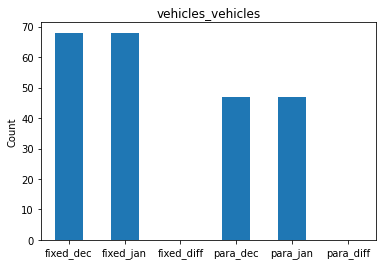

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
0,Revenue Vehicles owned,52.0,52.0,0.0,47.0,47.0,0.0,vehicles_vehicles
1,Revenue Vehicles leased,0.0,0.0,0.0,0.0,0.0,0.0,vehicles_vehicles
2,Light Vehicles owned,16.0,16.0,0.0,0.0,0.0,0.0,vehicles_vehicles
3,Light Vehicles leased,0.0,0.0,0.0,0.0,0.0,0.0,vehicles_vehicles


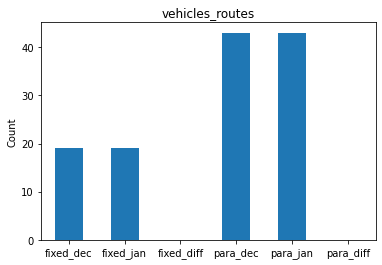

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
4,Number of active routes,19.0,19.0,0.0,43.0,43.0,0.0,vehicles_routes


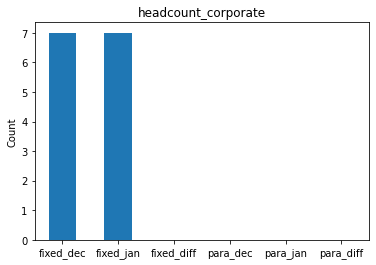

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
5,Corporate headcount,7.0,7.0,0.0,0.0,0.0,0.0,headcount_corporate


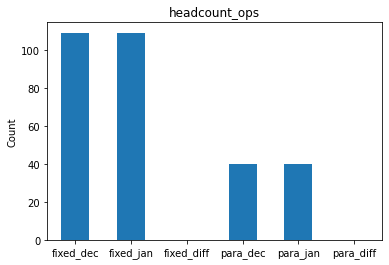

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
6,Local Operators headcount,109.0,109.0,0.0,40.0,40.0,0.0,headcount_ops


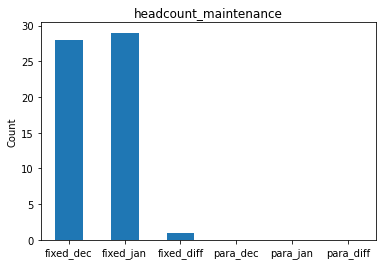

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
7,Local Maintenance headcount,28.0,29.0,1.0,0.0,0.0,0.0,headcount_maintenance


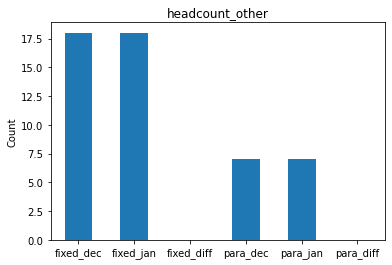

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
8,Local Other headcount,18.0,18.0,0.0,7.0,7.0,0.0,headcount_other


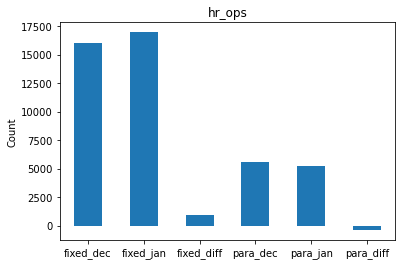

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
9,Regular Hours Worked ops,13634.0,14231.0,597.0,4457.0,3327.0,-1130.0,hr_ops
10,Overtime Hours ops,1866.0,2589.0,723.0,1028.5,1858.0,829.5,hr_ops
11,Sick Leave Hours ops,515.0,123.0,-392.0,96.0,20.0,-76.0,hr_ops
12,Paid Leave Hours ops,0.0,0.0,0.0,0.0,0.0,0.0,hr_ops


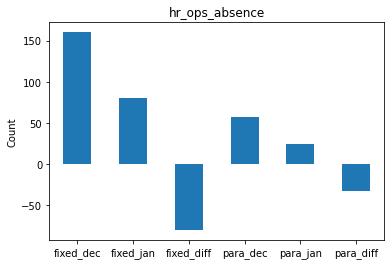

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
13,Sick Leave Days,74.0,45.0,-29.0,12.0,6.0,-6.0,hr_ops_absence
14,Days Lost Due to Work-Related Accidents mainte...,44.0,22.0,-22.0,22.0,11.0,-11.0,hr_ops_absence
15,Days of Unauthorized Leave maintenance,42.0,13.0,-29.0,23.0,7.0,-16.0,hr_ops_absence


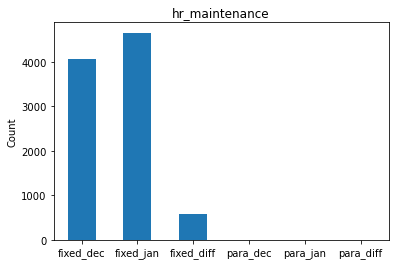

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
16,Regular Hours Worked maintenance,3764.0,4532.0,768.0,0.0,0.0,0.0,hr_maintenance
17,Overtime Hours maintenance,233.0,100.0,-133.0,0.0,0.0,0.0,hr_maintenance
18,Sick Leave Hours maintenance,71.0,22.0,-49.0,0.0,0.0,0.0,hr_maintenance
19,Paid Leave Hours maintenance,0.0,0.0,0.0,0.0,0.0,0.0,hr_maintenance


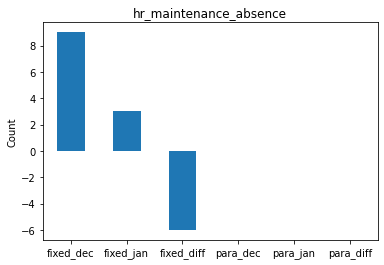

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
20,Sick Leave Days maintenance,9.0,3.0,-6.0,0.0,0.0,0.0,hr_maintenance_absence
21,Days Lost Due To Work-Related Accidents mainte...,0.0,0.0,0.0,0.0,0.0,0.0,hr_maintenance_absence
22,Days of Unauthoirzed Leave maintenance,0.0,0.0,0.0,0.0,0.0,0.0,hr_maintenance_absence


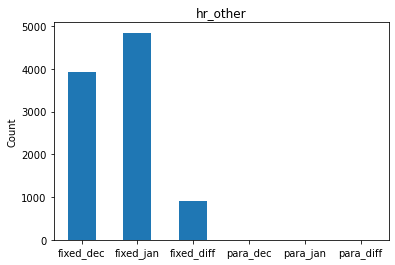

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
23,Regular Hours Worked other,3165.0,4500.0,1335.0,0.0,0.0,0.0,hr_other
24,Overtime Hours other,774.0,345.0,-429.0,0.0,0.0,0.0,hr_other
25,Sick Leave Hours other,0.0,0.0,0.0,0.0,0.0,0.0,hr_other
26,Paid Leave Hours other,0.0,0.0,0.0,0.0,0.0,0.0,hr_other


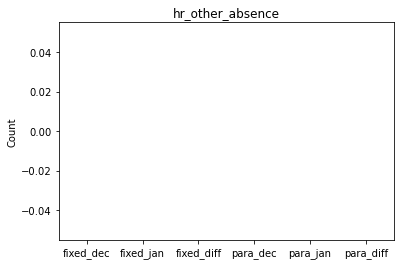

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
27,Sick Leave Days other,0.0,0.0,0.0,0.0,0.0,0.0,hr_other_absence
28,Days Lost Due to Work-Related Accidents other,0.0,0.0,0.0,0.0,0.0,0.0,hr_other_absence
29,Days of Unauthorized Leave other,0.0,0.0,0.0,0.0,0.0,0.0,hr_other_absence


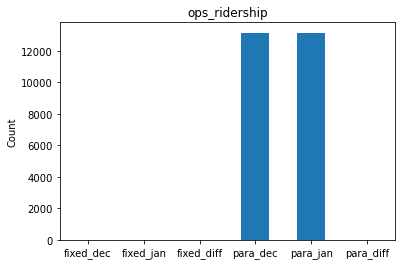

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
30,Total Unlinked Passenger Trips,0.0,0.0,0.0,13155.0,13155.0,0.0,ops_ridership


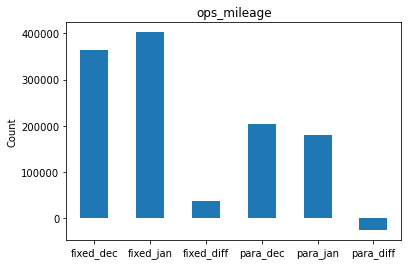

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
31,Total Service Miles,181642.0,201001.0,19359.0,98193.0,99932.0,1739.0,ops_mileage
32,Total Revenue Miles,181642.0,201001.0,19359.0,70228.0,79398.0,9170.0,ops_mileage
33,Service Miles Subcontracted,0.0,0.0,0.0,35825.0,0.0,-35825.0,ops_mileage
34,Contractual Revenue Miles,0.0,0.0,0.0,0.0,0.0,0.0,ops_mileage


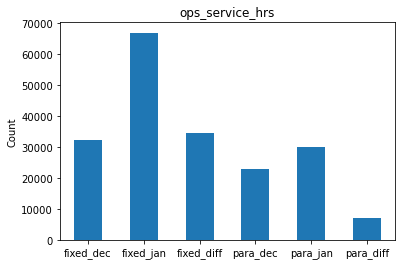

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
35,Total Service Hours,18656.0,25343.0,6687.0,7844.0,9997.0,2153.0,ops_service_hrs
36,Total Revenue Hours,13584.0,16272.0,2688.0,7075.0,9987.0,2912.0,ops_service_hrs
37,Total Platform Hours,0.0,25343.0,25343.0,7844.0,9997.0,2153.0,ops_service_hrs


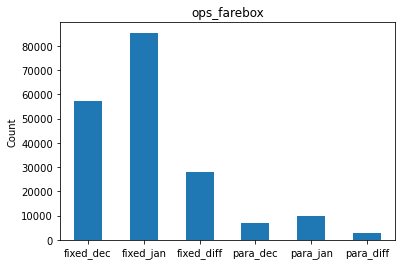

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
38,Actual to Farebox Variance percentage,0.00,0.0,0.00,0.00,0.0,0.00,ops_farebox
39,Total Farebox Revenue,57337.64,85345.0,28007.36,6865.12,9899.0,3033.88,ops_farebox


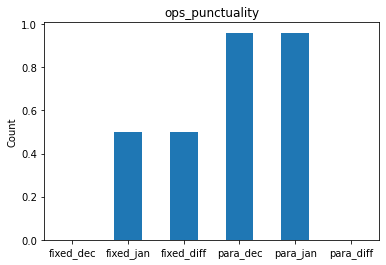

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
40,On-Time Performance percentage,0.0,0.5,0.5,0.96,0.96,0.0,ops_punctuality


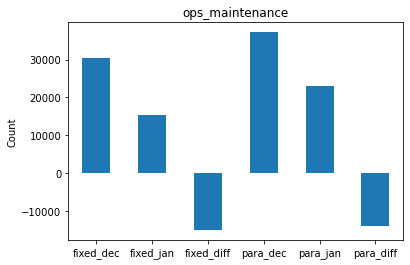

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
41,Count Scheduled PM Inspections,43.0,50.0,7.0,29.0,40.0,11.0,ops_maintenance
42,Count PM Inspections Performed on Time,42.0,25.0,-17.0,29.0,30.0,1.0,ops_maintenance
43,Pms On-Time percentage,1.0,0.5,-0.5,1.0,0.7,-0.3,ops_maintenance
44,Lost Mileage Due to Rolling Stock,0.0,0.0,0.0,0.0,0.0,0.0,ops_maintenance
45,Number of Road Calls,3.0,3.0,0.0,3.0,3.0,0.0,ops_maintenance
46,Lost Mileage Due to External Causes,0.0,0.0,0.0,0.0,0.0,0.0,ops_maintenance
47,Lost Mileage Due to Internal Causes,0.0,0.0,0.0,0.0,0.0,0.0,ops_maintenance
48,Vehicle Fires,0.0,0.0,0.0,0.0,0.0,0.0,ops_maintenance
49,Miles Betweed Road Calls,30241.0,15222.0,-15019.0,37143.0,23045.0,-14098.0,ops_maintenance


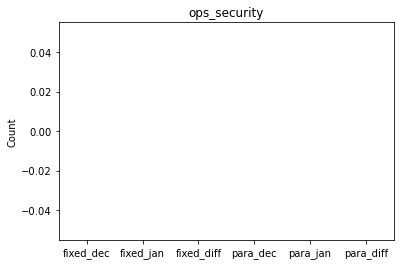

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
50,Number of Securit Incidents,0.0,0.0,0.0,0.0,0.0,0.0,ops_security


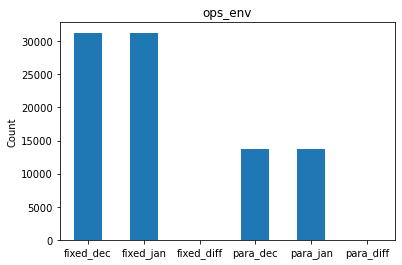

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
51,Electricity Consumption,0.0,0.0,0.0,0.0,0.0,0.0,ops_env
52,Gallons of Fuel - Revenue Vehicles,30384.0,30384.0,0.0,13782.0,13782.0,0.0,ops_env
53,Gallons of Fuel - Support Vehicles,895.0,895.0,0.0,0.0,0.0,0.0,ops_env


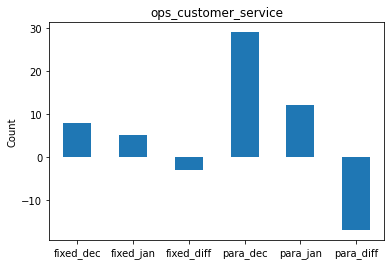

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
54,Justified Complaints,4.0,2.0,-2.0,11.0,6.0,-5.0,ops_customer_service
55,Non-Justified Complaints,4.0,3.0,-1.0,18.0,6.0,-12.0,ops_customer_service
56,Trip Denials,0.0,0.0,0.0,0.0,0.0,0.0,ops_customer_service


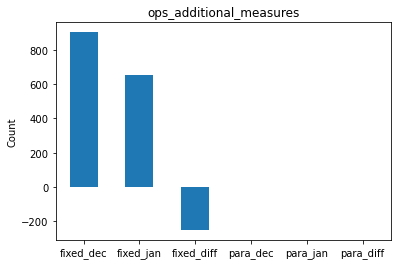

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
57,Missed Trips,875.0,623.0,-252.0,0.0,0.0,0.0,ops_additional_measures
58,Contractual KPIs Met,28.0,29.0,1.0,0.0,0.0,0.0,ops_additional_measures
59,Additional Miles Ran,0.0,0.0,0.0,0.0,0.0,0.0,ops_additional_measures


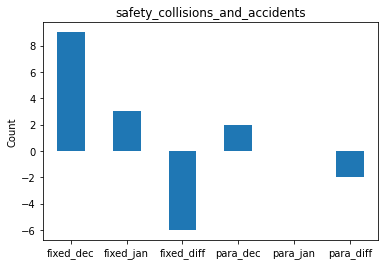

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
60,Preventable collisions,2.0,0.0,-2.0,2.0,0.0,-2.0,safety_collisions_and_accidents
61,Non-Preventable Collisions,7.0,3.0,-4.0,0.0,0.0,0.0,safety_collisions_and_accidents


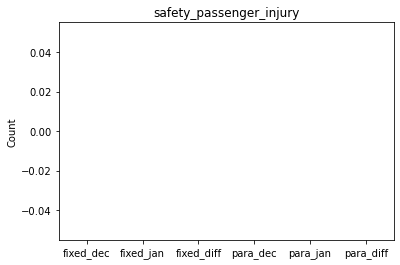

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
62,Number of Passenger Injury on Vehicle,0.0,0.0,0.0,0.0,0.0,0.0,safety_passenger_injury
63,Number of Passenger Injury Related to Collisions,0.0,0.0,0.0,0.0,0.0,0.0,safety_passenger_injury
64,Total Preventable Passenger Accidents,0.0,0.0,0.0,0.0,0.0,0.0,safety_passenger_injury


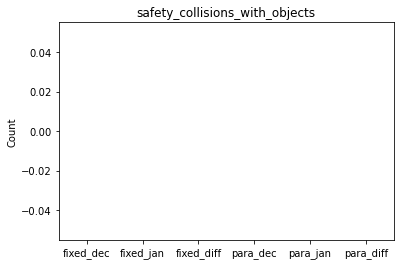

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
65,Collisions with Pedestrian,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_with_objects
66,Collisions with Bicyclists,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_with_objects
67,Collisions with Motorcycles,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_with_objects


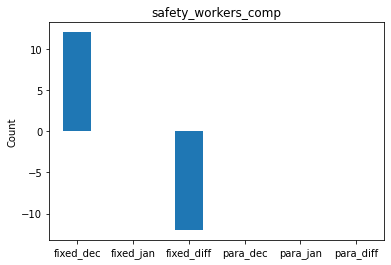

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
68,Total First Aid Only Claims,0.0,0.0,0.0,0.0,0.0,0.0,safety_workers_comp
69,Total Med-Only Injury Claims,1.0,0.0,-1.0,0.0,0.0,0.0,safety_workers_comp
70,Total Lost Time Only Injury Claims,0.0,0.0,0.0,0.0,0.0,0.0,safety_workers_comp
71,Total Workers Compensation Claims,1.0,0.0,-1.0,0.0,0.0,0.0,safety_workers_comp
72,Total Number of Lost Work Days,9.0,0.0,-9.0,0.0,0.0,0.0,safety_workers_comp
73,Total Workers Compensations (<1 Yr on Board),1.0,0.0,-1.0,0.0,0.0,0.0,safety_workers_comp


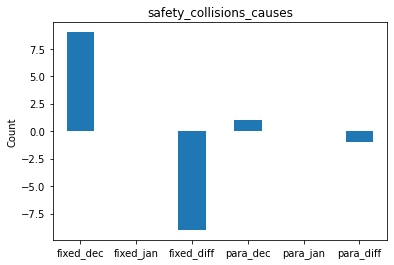

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
74,Improper Backing,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_causes
75,Hit Fixed Object,1.0,0.0,-1.0,1.0,0.0,-1.0,safety_collisions_causes
76,Hit Parked Vehicle,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_causes
77,Intersection,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_causes
78,Rear End,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_causes
79,Pedestrian & Cyclist,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_causes
80,Sideswipe,7.0,0.0,-7.0,0.0,0.0,0.0,safety_collisions_causes
81,Improper Turning,1.0,0.0,-1.0,0.0,0.0,0.0,safety_collisions_causes
82,others,0.0,0.0,0.0,0.0,0.0,0.0,safety_collisions_causes


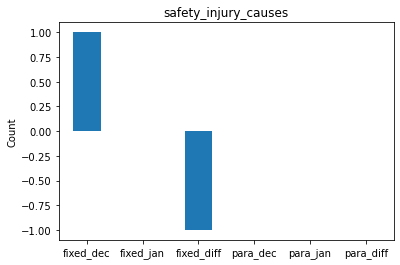

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
83,"Slip, Trip and Fall",0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes
84,Improper Lifting,0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes
85,"Push, Pull and Twist",0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes
86,Collision,1.0,0.0,-1.0,0.0,0.0,0.0,safety_injury_causes
87,Cut/Laceration/Puncture,0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes
88,Occupational Injury,0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes
89,Assault,0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes
90,others,0.0,0.0,0.0,0.0,0.0,0.0,safety_injury_causes


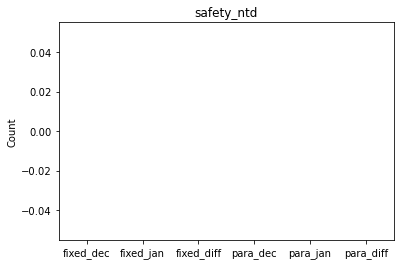

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
91,Fatality,0.0,0.0,0.0,0.0,0.0,0.0,safety_ntd
92,Injuries Requiring Immediate Medical Transport,0.0,0.0,0.0,0.0,0.0,0.0,safety_ntd
93,Property Damage > $25k,0.0,0.0,0.0,0.0,0.0,0.0,safety_ntd


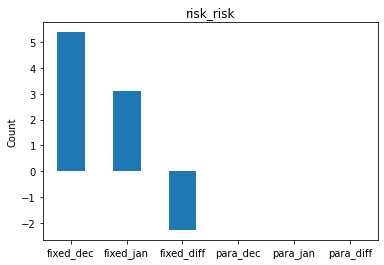

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
94,Total Subrogation Claims Submitted,0.00,0.0,0.00,0.0,0.0,0.0,risk_risk
95,KPI: Preventable AFR,2.80,1.3,-1.50,0.0,0.0,0.0,risk_risk
96,Severity in Accidents,0.00,0.0,0.00,0.0,0.0,0.0,risk_risk
97,Collisions Per 100k Miles,2.58,1.8,-0.78,0.0,0.0,0.0,risk_risk
98,Employee Injury Rate,0.00,0.0,0.00,0.0,0.0,0.0,risk_risk


In [8]:
# note that this function can be utilized in all future month over month kpi analysis to easily show differences in categories
plot_category_counts(df)

In [9]:
# running the same function on filtered data to only focus on kpi changes

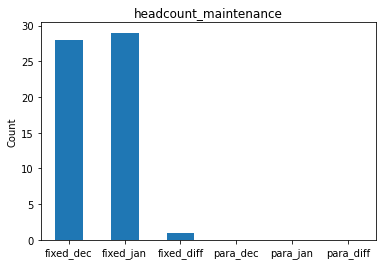

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
7,Local Maintenance headcount,28.0,29.0,1.0,0.0,0.0,0.0,headcount_maintenance


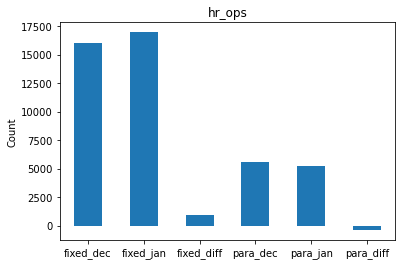

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
9,Regular Hours Worked ops,13634.0,14231.0,597.0,4457.0,3327.0,-1130.0,hr_ops
10,Overtime Hours ops,1866.0,2589.0,723.0,1028.5,1858.0,829.5,hr_ops
11,Sick Leave Hours ops,515.0,123.0,-392.0,96.0,20.0,-76.0,hr_ops


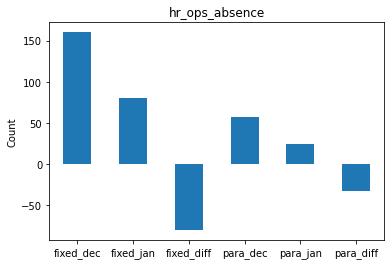

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
13,Sick Leave Days,74.0,45.0,-29.0,12.0,6.0,-6.0,hr_ops_absence
14,Days Lost Due to Work-Related Accidents mainte...,44.0,22.0,-22.0,22.0,11.0,-11.0,hr_ops_absence
15,Days of Unauthorized Leave maintenance,42.0,13.0,-29.0,23.0,7.0,-16.0,hr_ops_absence


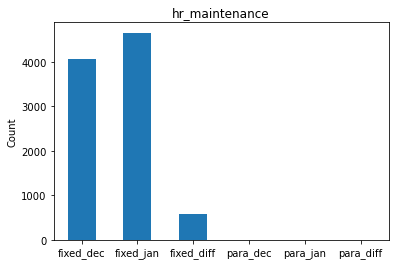

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
16,Regular Hours Worked maintenance,3764.0,4532.0,768.0,0.0,0.0,0.0,hr_maintenance
17,Overtime Hours maintenance,233.0,100.0,-133.0,0.0,0.0,0.0,hr_maintenance
18,Sick Leave Hours maintenance,71.0,22.0,-49.0,0.0,0.0,0.0,hr_maintenance


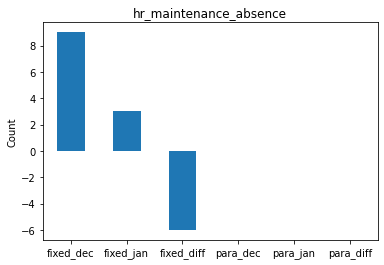

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
20,Sick Leave Days maintenance,9.0,3.0,-6.0,0.0,0.0,0.0,hr_maintenance_absence


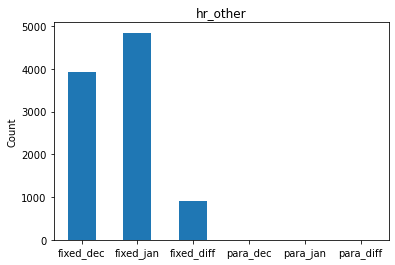

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
23,Regular Hours Worked other,3165.0,4500.0,1335.0,0.0,0.0,0.0,hr_other
24,Overtime Hours other,774.0,345.0,-429.0,0.0,0.0,0.0,hr_other


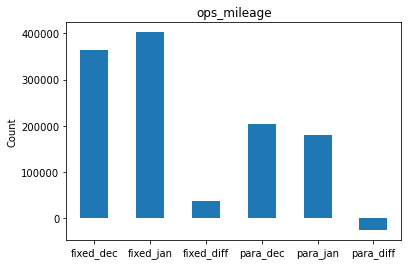

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
31,Total Service Miles,181642.0,201001.0,19359.0,98193.0,99932.0,1739.0,ops_mileage
32,Total Revenue Miles,181642.0,201001.0,19359.0,70228.0,79398.0,9170.0,ops_mileage
33,Service Miles Subcontracted,0.0,0.0,0.0,35825.0,0.0,-35825.0,ops_mileage


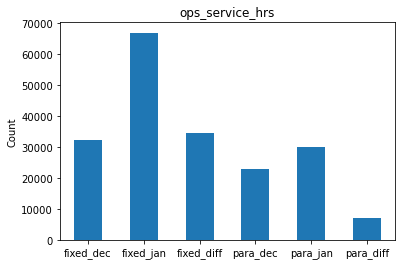

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
35,Total Service Hours,18656.0,25343.0,6687.0,7844.0,9997.0,2153.0,ops_service_hrs
36,Total Revenue Hours,13584.0,16272.0,2688.0,7075.0,9987.0,2912.0,ops_service_hrs
37,Total Platform Hours,0.0,25343.0,25343.0,7844.0,9997.0,2153.0,ops_service_hrs


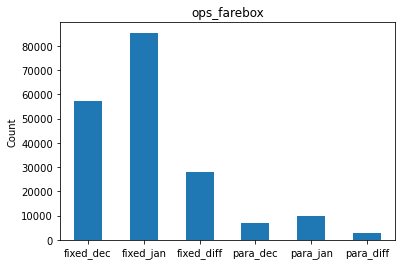

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
39,Total Farebox Revenue,57337.64,85345.0,28007.36,6865.12,9899.0,3033.88,ops_farebox


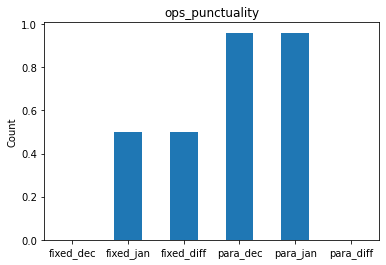

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
40,On-Time Performance percentage,0.0,0.5,0.5,0.96,0.96,0.0,ops_punctuality


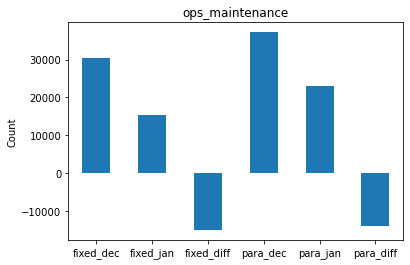

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
41,Count Scheduled PM Inspections,43.0,50.0,7.0,29.0,40.0,11.0,ops_maintenance
42,Count PM Inspections Performed on Time,42.0,25.0,-17.0,29.0,30.0,1.0,ops_maintenance
43,Pms On-Time percentage,1.0,0.5,-0.5,1.0,0.7,-0.3,ops_maintenance
49,Miles Betweed Road Calls,30241.0,15222.0,-15019.0,37143.0,23045.0,-14098.0,ops_maintenance


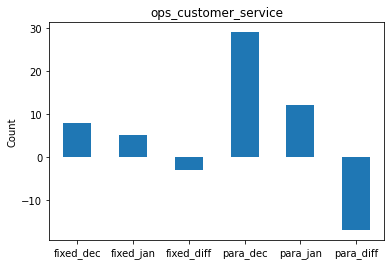

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
54,Justified Complaints,4.0,2.0,-2.0,11.0,6.0,-5.0,ops_customer_service
55,Non-Justified Complaints,4.0,3.0,-1.0,18.0,6.0,-12.0,ops_customer_service


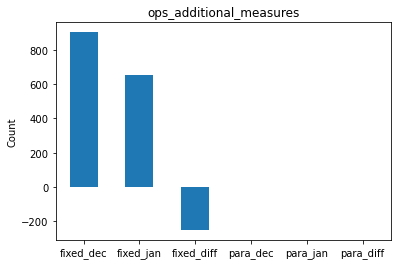

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
57,Missed Trips,875.0,623.0,-252.0,0.0,0.0,0.0,ops_additional_measures
58,Contractual KPIs Met,28.0,29.0,1.0,0.0,0.0,0.0,ops_additional_measures


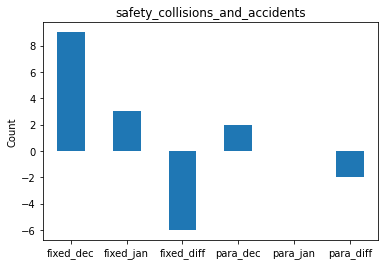

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
60,Preventable collisions,2.0,0.0,-2.0,2.0,0.0,-2.0,safety_collisions_and_accidents
61,Non-Preventable Collisions,7.0,3.0,-4.0,0.0,0.0,0.0,safety_collisions_and_accidents


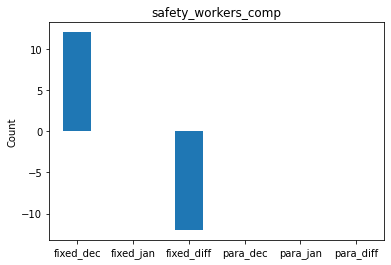

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
69,Total Med-Only Injury Claims,1.0,0.0,-1.0,0.0,0.0,0.0,safety_workers_comp
71,Total Workers Compensation Claims,1.0,0.0,-1.0,0.0,0.0,0.0,safety_workers_comp
72,Total Number of Lost Work Days,9.0,0.0,-9.0,0.0,0.0,0.0,safety_workers_comp
73,Total Workers Compensations (<1 Yr on Board),1.0,0.0,-1.0,0.0,0.0,0.0,safety_workers_comp


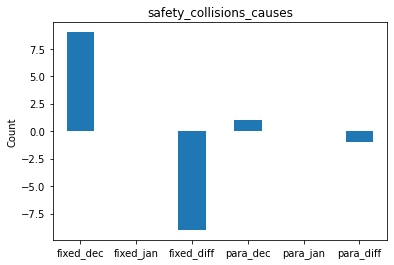

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
75,Hit Fixed Object,1.0,0.0,-1.0,1.0,0.0,-1.0,safety_collisions_causes
80,Sideswipe,7.0,0.0,-7.0,0.0,0.0,0.0,safety_collisions_causes
81,Improper Turning,1.0,0.0,-1.0,0.0,0.0,0.0,safety_collisions_causes


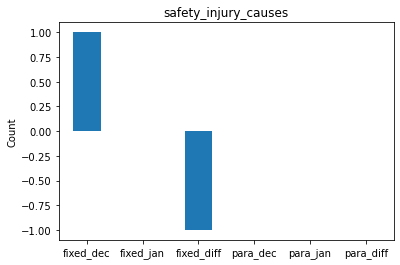

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
86,Collision,1.0,0.0,-1.0,0.0,0.0,0.0,safety_injury_causes


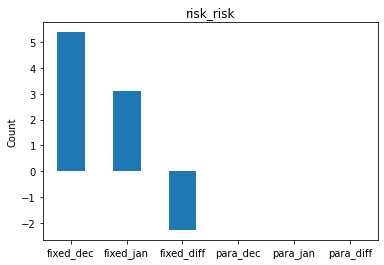

,item,fixed_dec,fixed_jan,fixed_diff,para_dec,para_jan,para_diff,category
95,KPI: Preventable AFR,2.80,1.3,-1.50,0.0,0.0,0.0,risk_risk
97,Collisions Per 100k Miles,2.58,1.8,-0.78,0.0,0.0,0.0,risk_risk


In [10]:
plot_category_counts(df_filtered)